<a href="https://colab.research.google.com/github/lucila-03/ML/blob/main/MVP_Pistache.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP treinamento de modelo para definir origem de pistache
## Lucila da Conceição Castello Branco


## 1. Definição do Problema *

O dataset usado neste projeto será um arquivo do Kaggle com informações de pistache, o objetivo desse projeto é treinar um modelo que com base nos dados informados seja identificada a classe ou categoria do pistache.
**Informações sobre os atributos:**
AREA - A área da região do pistache
PERIMETER -  O perímetro (comprimento total) do pistache
MAJOR_AXIS - O comprimento do eixo maior da elipse do pistache
MINOR_AXIS - O comprimento do eixo menor da elipse do pistache
EXCENTRICIDADE - O comprimento do alongamento do pistache
EQDIASQ -  O diâmetro equivalente do pistache
SOLIDEZ - A razão entre a área do pistache e a área de seu casco convexo
CONVEX_AREA -  A área do casco convexo da área do pistache
EXTENT - A proporção da área do pistache para a área da casca
ASPECT_RATIO - A proporção entre o comprimento do eixo principal e o comprimento do eixo menor, indicando a forma do pistache
REDONDO - Uma medida de quão perto o pistache se assemelha a um círculo perfeito (circularidade)
COMPACTNESS- Uma medida de quão compacta é a forma do pistache
SHAPEFACTOR_1 - Fator de forma 1, um descritor geométrico calculado a partir da área e perímetro de pistache
SHAPEFACTOR_2 - Fator de forma 2, outro descritor geométrico calculado a partir da área e perímetro do pistache
SHAPEFACTOR_3 - Fator de forma 3, um descritor geométrico derivado da área e perímetro do pistache
SHAPEFACTOR_4 - Fator de forma 4, outro descritor geométrico derivado da área e perímetro do pistache
CLASS - A classe ou categoria do pistache

In [59]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from joblib import dump
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from scipy.stats import randint, uniform


## 2. Carga de Dados

In [38]:
# Carrega arquivo csv usando Pandas usando uma URL

# Importação do dataset

url = "https://raw.githubusercontent.com/lucila-03/ML/main/pistachio.csv"
dataset = pd.read_csv(url, delimiter = "," )

## 3. Análise de Dados e tratamento

Será realizado um levantamento dos tipos de dados, análise e ajustes para que a base de dados fique pronta para o estudo.

In [39]:
# Mostra as dimensões do dataset
dataset.shape

(1718, 17)

In [40]:
# Mostra as informações do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           1718 non-null   int64  
 1   PERIMETER      1718 non-null   float64
 2   MAJOR_AXIS     1718 non-null   float64
 3   MINOR_AXIS     1718 non-null   float64
 4   ECCENTRICITY   1718 non-null   float64
 5   EQDIASQ        1718 non-null   float64
 6   SOLIDITY       1718 non-null   float64
 7   CONVEX_AREA    1718 non-null   int64  
 8   EXTENT         1718 non-null   float64
 9   ASPECT_RATIO   1718 non-null   float64
 10  ROUNDNESS      1718 non-null   float64
 11  COMPACTNESS    1718 non-null   float64
 12  SHAPEFACTOR_1  1718 non-null   float64
 13  SHAPEFACTOR_2  1718 non-null   float64
 14  SHAPEFACTOR_3  1718 non-null   float64
 15  SHAPEFACTOR_4  1718 non-null   float64
 16  Class          1718 non-null   object 
dtypes: float64(14), int64(2), object(1)
memory usage: 22

Foi identificado que o arquivo está perfeito, não tem valores nulos ou faltantes, portanto seria interessante conhecer melhor os dados do dataset.

In [41]:
dataset.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000
mean,79871.952852,1421.797588,446.206444,238.193128,0.840347,317.790000,0.940103,84947.671129,0.716055,1.899342,0.570831,0.712841,0.005704,0.003017,0.510097,0.955185
std,12968.217051,373.408835,31.885328,30.426445,0.049026,26.571699,0.050006,13081.742551,0.052534,0.241253,0.211514,0.044230,0.000810,0.000334,0.063391,0.051735
min,29808.000000,858.363000,321.425500,133.509600,0.504900,194.814600,0.588000,37935.000000,0.427200,1.158500,0.062800,0.476000,0.004000,0.002400,0.226600,0.620400
25%,71898.500000,1169.633225,426.554100,217.875475,0.817500,302.562375,0.920250,76357.750000,0.688100,1.736325,0.372325,0.682000,0.005200,0.002800,0.465125,0.944200
50%,79795.000000,1260.785500,448.453150,235.888750,0.850250,318.744650,0.953800,84973.000000,0.726100,1.899550,0.643850,0.709750,0.005600,0.003000,0.503750,0.972800
75%,88980.000000,1599.479000,467.515200,257.433625,0.875375,336.590000,0.976300,93660.750000,0.753600,2.068575,0.744450,0.741600,0.006100,0.003200,0.549975,0.986800
max,124008.000000,2755.049100,535.642200,383.046100,0.946000,397.356100,0.995100,132478.000000,0.820400,3.085800,0.933600,0.869500,0.013100,0.005300,0.756100,0.999000


Aparentemente está tudo certo, mas é importante ver melhor os dados, portanto um histograma de cada uma das colunas oferece uma boa visão do conteudo.

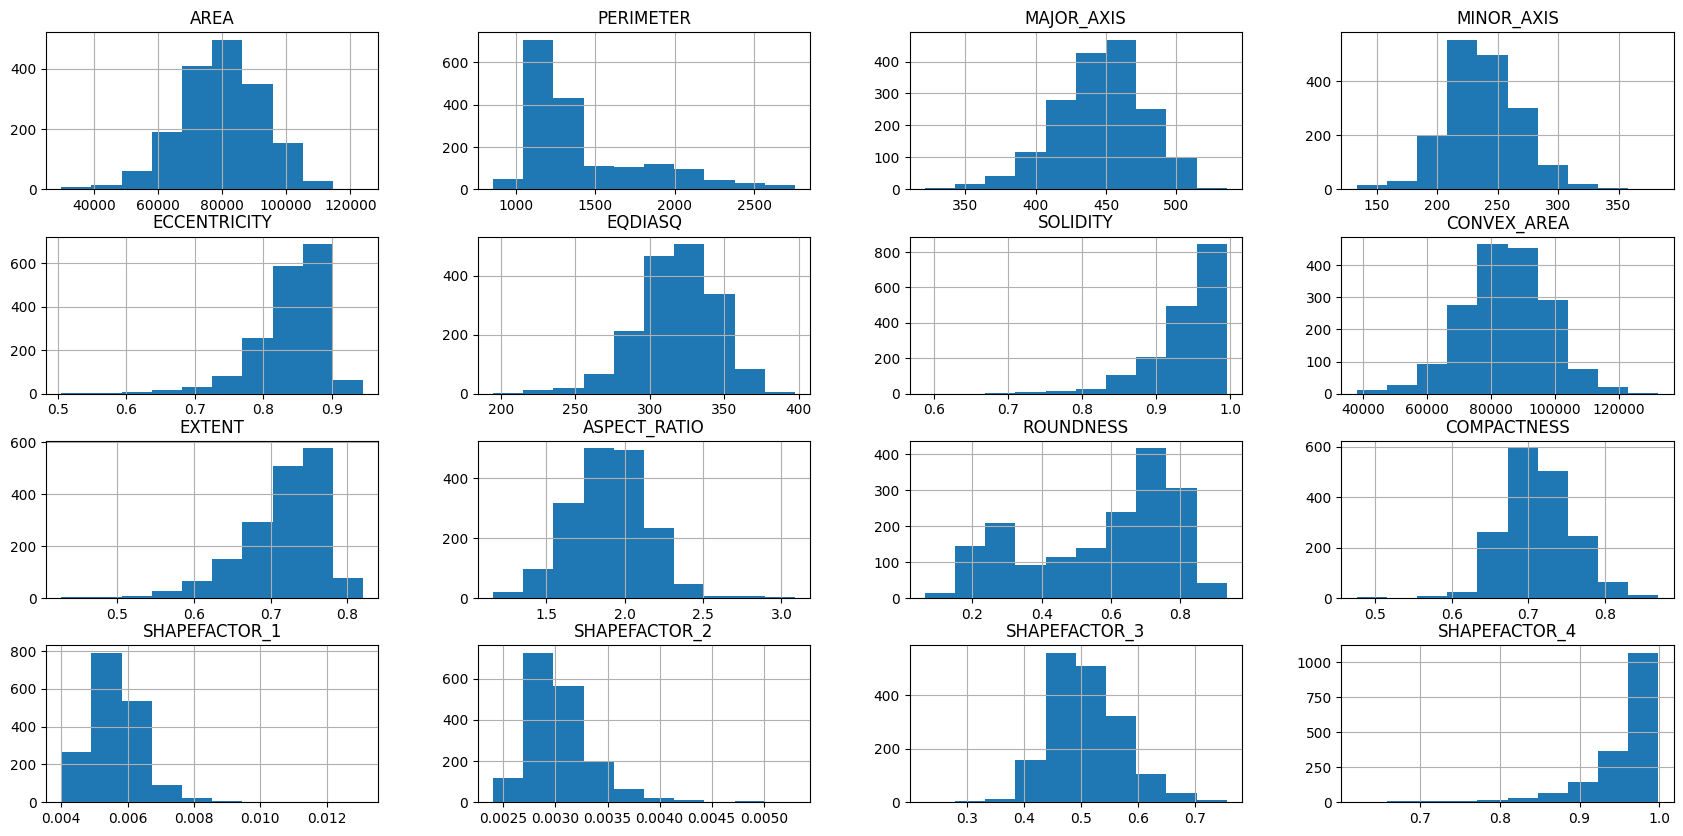

In [42]:
# Histograma
dataset.hist(figsize = (21,10))
plt.show()



O histograma deu uma noção da quantidade de valores que esta sendo tratada e a principio está tudo certo.

## 4. Modelagem e Inferência


Para começar a modelagem é preciso separar uma parte para testar.

In [43]:
# Separação em bases de treino e teste (holdout)
array = dataset.values
X = array[:,0:16] # atributos
y = array[:,16] # classe (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7) # faz a divisão

# Validação cruzada
scoring = 'accuracy'
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

###Criação e avaliação do modelo



O código tem por objetivo criar várias opções de modelos para que sejam treinados e consigam prever a classe dos pistaches e o resultado será baseado na maior acurácia.

LR: 0.871033 (0.018818)
KNN: 0.752045 (0.040274)
CART: 0.822755 (0.022645)
NB: 0.802018 (0.033771)
SVM: 0.771219 (0.043301)
Bagging: 0.875220 (0.025748)
RF: 0.881894 (0.023916)
ET: 0.873561 (0.021232)
Ada: 0.864421 (0.027986)
GB: 0.878526 (0.019076)
Voting: 0.855234 (0.029170)


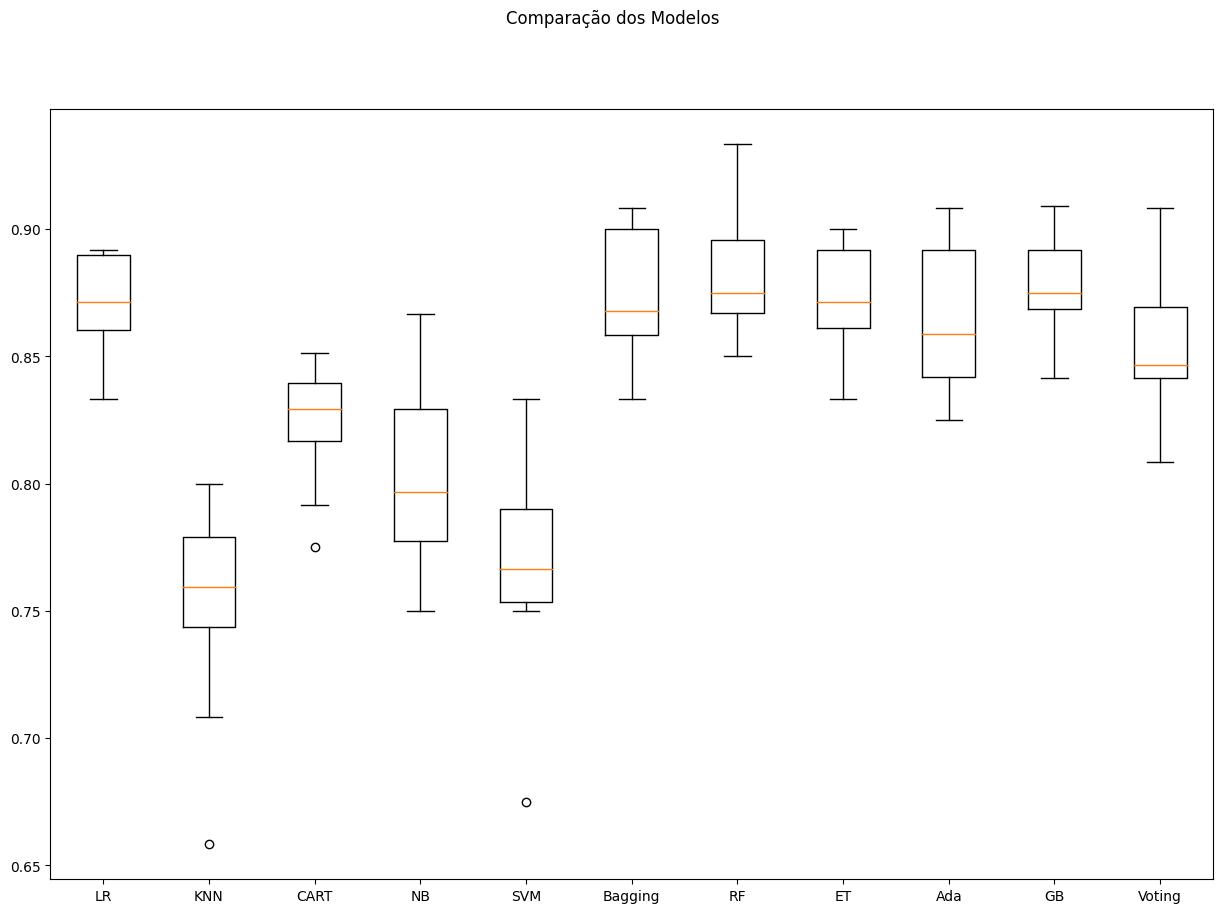

In [44]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=100)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 200
max_features = 5

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []

names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

A acurácia entre os modelos é muito próxima e somente em alguns modelos tem outliers,mas o melhor é o Random Forest com 88% de acurácia, um balanceamento ou padronização possibilite uma melhora da informação.

Modelagem dos dados

LR-orig: 0.870 (0.018)
KNN-orig: 0.752 (0.040)
CART-orig: 0.823 (0.023)
NB-orig: 0.802 (0.034)
SVM-orig: 0.771 (0.043)
Bag-orig: 0.875 (0.026)
RF-orig: 0.882 (0.024)
ET-orig: 0.874 (0.021)
Ada-orig: 0.864 (0.028)
GB-orig: 0.879 (0.019)
Vot-orig: 0.855 (0.029)
LR-padr: 0.877 (0.018)
KNN-padr: 0.860 (0.018)
CART-padr: 0.819 (0.028)
NB-padr: 0.869 (0.022)
SVM-padr: 0.875 (0.020)
Bag-padr: 0.874 (0.027)
RF-padr: 0.879 (0.029)
ET-padr: 0.872 (0.021)
Ada-padr: 0.864 (0.028)
GB-padr: 0.878 (0.019)
Vot-padr: 0.875 (0.019)
LR-norm: 0.864 (0.022)
KNN-norm: 0.863 (0.019)
CART-norm: 0.828 (0.027)
NB-norm: 0.869 (0.022)
SVM-norm: 0.877 (0.024)
Bag-norm: 0.876 (0.024)
RF-norm: 0.879 (0.028)
ET-norm: 0.869 (0.025)
Ada-norm: 0.865 (0.029)
GB-norm: 0.878 (0.019)
Vot-norm: 0.874 (0.022)


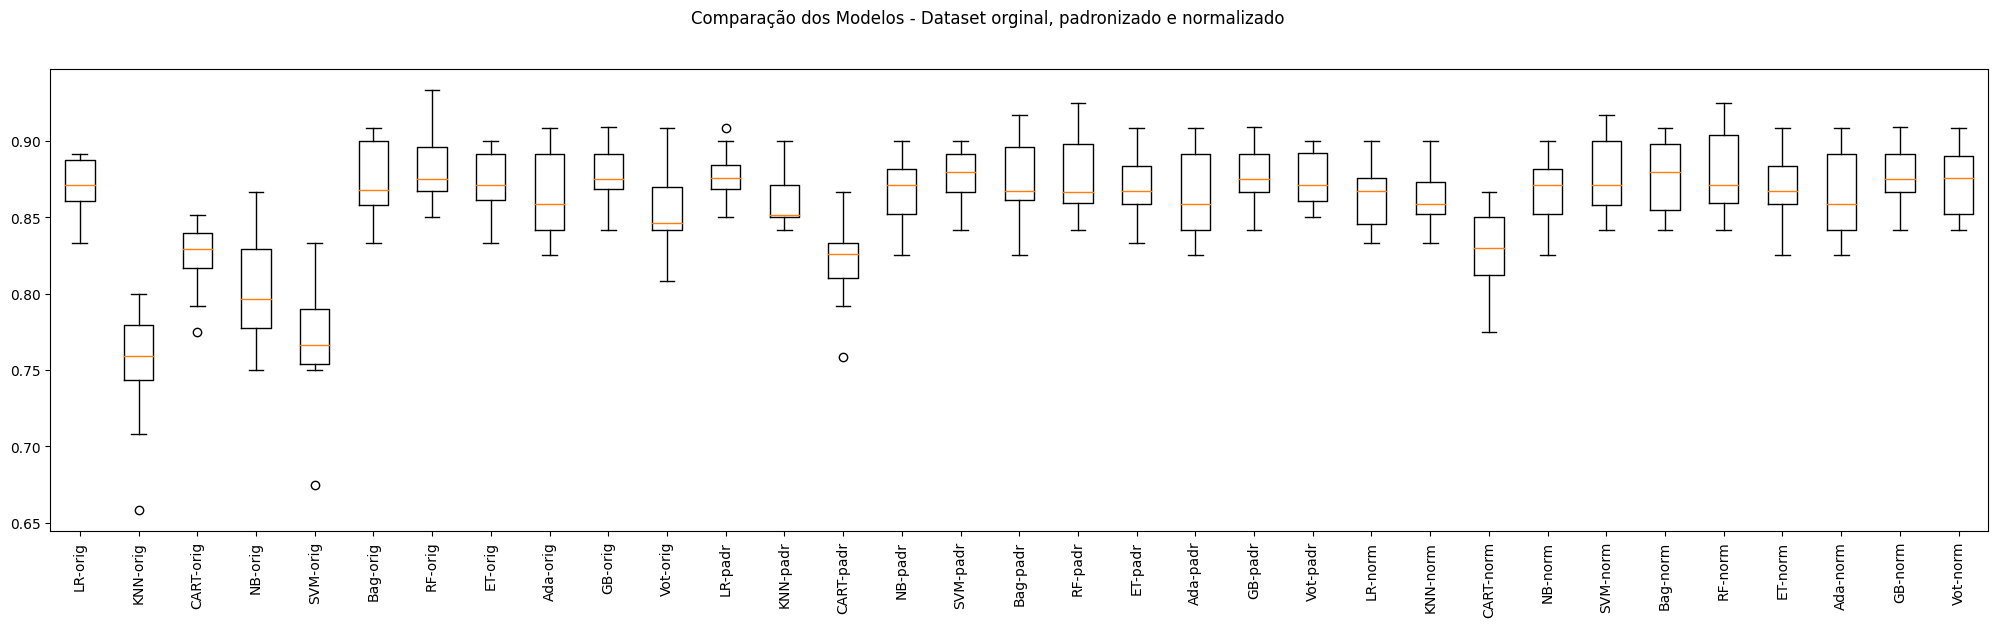

In [45]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

Os dados foram balanceados e normalizados, no geral houve uma melhora nos outliers,mas apesar de todos apresentarem um resultado muito próximo o melhor modelo foi o Random Forest com 0,88 de acurácia.
Será aplicado o hiperparâmetro para analisar se há uma melhora nas informações.

Melhor estimador: extra-trees-orig


<Figure size 800x600 with 0 Axes>

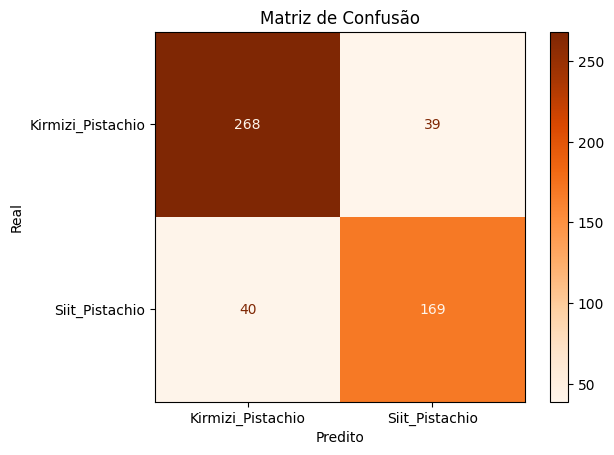

Relatório de Classificação:
                   precision    recall  f1-score   support

Kirmizi_Pistachio       0.87      0.87      0.87       307
   Siit_Pistachio       0.81      0.81      0.81       209

         accuracy                           0.85       516
        macro avg       0.84      0.84      0.84       516
     weighted avg       0.85      0.85      0.85       516



In [46]:
#Aplicação de Hiperparametros

np.random.seed(7)  # definindo uma semente global para este bloco

# Definindo os componentes do pipeline
extra_trees = ('ExtraTrees', ExtraTreesClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines = []
pipelines.append(('extra-trees-orig', Pipeline(steps=[extra_trees])))
pipelines.append(('extra-trees-padr', Pipeline(steps=[standard_scaler, extra_trees])))
pipelines.append(('extra-trees-norm', Pipeline(steps=[min_max_scaler, extra_trees])))

param_dist = {
    'ExtraTrees__n_estimators': randint(50, 200),  # Limita os valores entre 50 e 200
    'ExtraTrees__max_features': ['auto', 'sqrt', 'log2'],
    'ExtraTrees__max_depth': [3, 5, 7, None],
    'ExtraTrees__min_samples_split': randint(2, 10)
}

# Prepara e executa o RandomizedSearchCV
best_estimator = None
best_score = float('-inf')

for name, model in pipelines:
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, scoring=scoring, cv=kfold)
    random_search.fit(X_train, y_train)

    if random_search.best_score_ > best_score:
        best_score = random_search.best_score_
        best_estimator = random_search.best_estimator_
        best_estimator_name = name
print('Melhor estimador:',best_estimator_name)
# Aplica o melhor estimador aos dados de teste
y_pred = best_estimator.predict(X_test)

# Obtém os rótulos reais antes da categorização
y_labels = np.unique(y)

# Calcula a matriz de confusão
confusion_mat = confusion_matrix(y_test, y_pred)

# Crie o objeto ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=y_labels)

# Plote a matriz de confusão
plt.figure(figsize=(8, 6))
cm_display.plot(cmap='Oranges')
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

# Outras métricas além da acurácia
classification_rep = classification_report(y_test, y_pred)
print("Relatório de Classificação:")
print(classification_rep)

Será aplcado o feature selection para analisar se há uma melhoria na acurácia principalmente porque o que apresenta melhor resultado é a árvore de decisão.

In [47]:
# SelectKBest

# Seleção de atributos com SelectKBest
best_var = SelectKBest(score_func=f_classif, k=4)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X, y)

# Reduz X para os atributos selecionados
features = fit.transform(X)

# Resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", dataset.columns[0:16])

# Exibe as pontuações de cada atributos e os 5 escolhidas (com as pontuações mais altas)
np.set_printoptions(precision=2) # 2 casas decimais
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=dataset.columns[0:16]))


Número original de atributos: 16

Número reduzido de atributos: 4

Atributos Originais: Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4'],
      dtype='object')

Scores dos Atributos Originais: [ 943.39   40.84   37.52 1363.8   709.15  887.25   24.72  917.82   18.17
  836.58   19.07 1070.46 1045.75   28.97 1084.74    5.09]

Atributos Selecionados: ['MINOR_AXIS' 'COMPACTNESS' 'SHAPEFACTOR_1' 'SHAPEFACTOR_3']


Inicialmente havia escolhido 5, mas será usado apenas 4 porque estão no mesmo patamar, acima de 1000. o sitema demonstra que o fator 1, o fator 3, o comprimento do eixo da menor elipse e a medida de quão compacta é o pistache são determinantes para definir a categoria

In [48]:
# Eliminação Recursiva de Atributos

# Criação do modelo
modelo = LogisticRegression(max_iter=200)

# Eliminação Recursiva de Atributos
rfe = RFE(modelo, n_features_to_select=4)
fit = rfe.fit(X, y)

# Print dos resultados
print("Atributos Originais:", dataset.columns[0:16])

# Exibe os atributos selecionados (marcados como True em "Atributos Selecionados"
# e com valor 1 em "Ranking dos Atributos")
print("\nAtributos Selecionados: %s" % fit.support_)
print("\nRanking de atributos: %s" % fit.ranking_)
print("\nQtd de melhores Atributos: %d" % fit.n_features_)
print("\nNomes dos Atributos Selecionados: %s" % fit.get_feature_names_out(input_features=dataset.columns[0:16]))

Atributos Originais: Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4'],
      dtype='object')

Atributos Selecionados: [False False  True  True False  True False False False  True False False
 False False False False]

Ranking de atributos: [ 2  8  1  1  3  1  5 11  6  1  9 10 12 13  7  4]

Qtd de melhores Atributos: 4

Nomes dos Atributos Selecionados: ['MAJOR_AXIS' 'MINOR_AXIS' 'EQDIASQ' 'ASPECT_RATIO']


In [49]:
# Importância de Atributos com ExtraTrees

# Criação do modelo para seleção de atributos
modelo = ExtraTreesClassifier(n_estimators=100)
modelo.fit(X,y)

# Exibe os atributos orginais
print("\nAtributos Originais:", dataset.columns[0:13])

# Exibe a pontuação de importância para cada atributo (quanto maior a pontuação, mais importante é o atributo).
print(modelo.feature_importances_)


Atributos Originais: Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1'],
      dtype='object')
[0.08 0.03 0.03 0.11 0.06 0.08 0.03 0.08 0.03 0.07 0.03 0.09 0.11 0.03
 0.09 0.04]


Com a eliminação recursiva de atributos foi identificado que 2 itens tem um peso de 11%, 1 pesa 9% e 3 pesam 8%, talvez uma feature de 6 apesar de ser maior, pode aumentar a acurácia.

Bag-orig: 0.875 (0.028)
RF-orig: 0.878 (0.025)
ET-orig: 0.875 (0.023)
Bag-padr: 0.878 (0.024)
RF-padr: 0.879 (0.028)
ET-padr: 0.872 (0.028)
Bag-norm: 0.876 (0.027)
CART-norm: 0.824 (0.032)
RF-norm: 0.879 (0.025)
ET-norm: 0.874 (0.028)


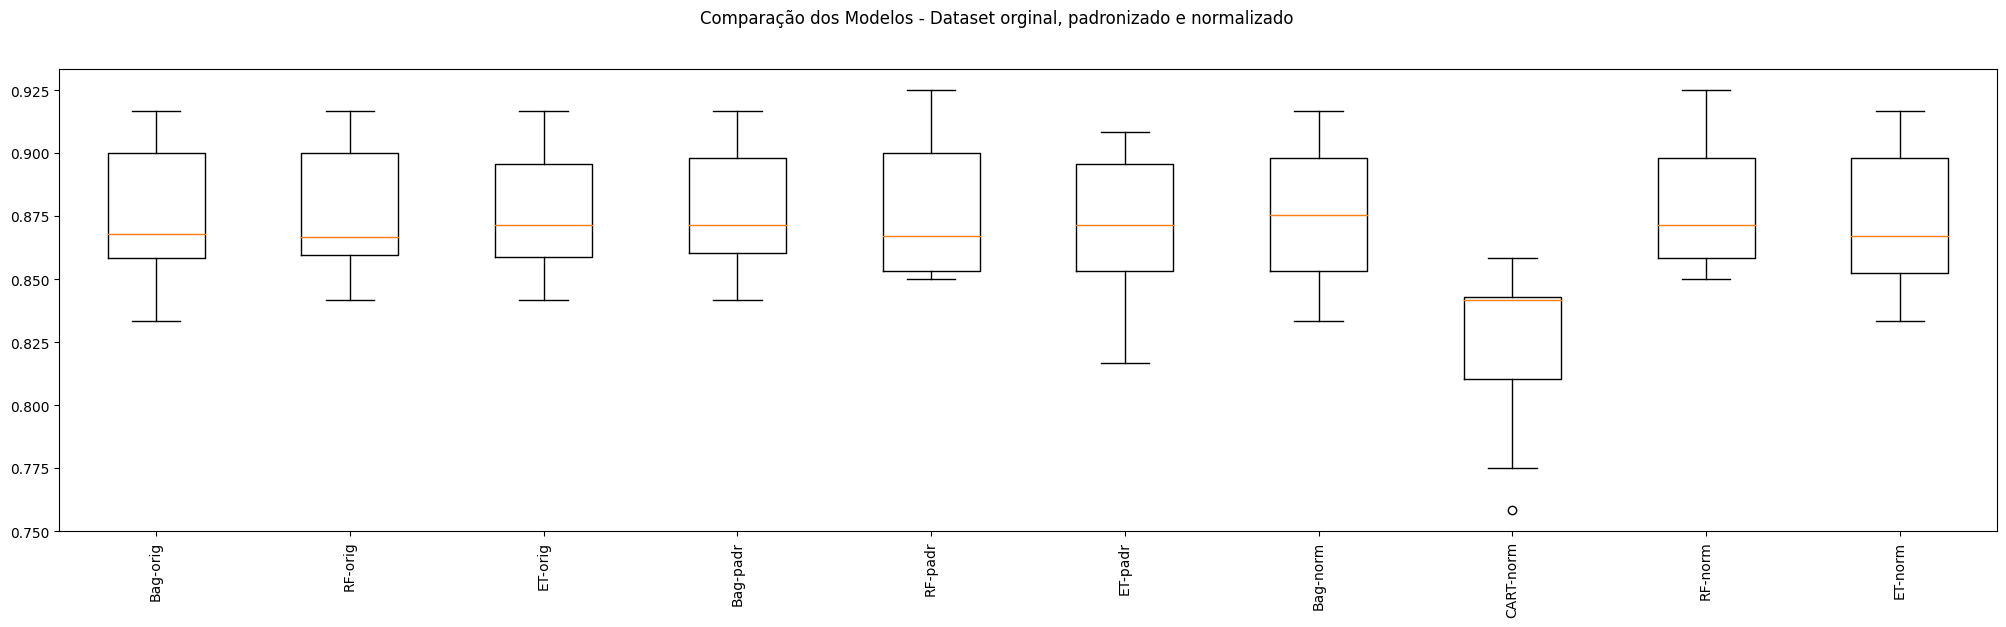

In [50]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 200
max_features = 6

# Algoritmos que serão utilizados

random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))

# Dataset Padronizado
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))

# Dataset Normalizado
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

Apesar das inúmeras tentativas, 5 features no Random Forest é o melhor até o momento, portanto esse é o modelo ideal, mas como última terntativa vou tentar otimizar os hiperparâmetros com o KNN

In [51]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))


Sem tratamento de missings: knn-orig - Melhor: 0.776205 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 15}
Sem tratamento de missings: knn-padr - Melhor: 0.880186 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 13}
Sem tratamento de missings: knn-norm - Melhor: 0.878512 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 13}


Apesar de todos os tratamentos apresentados, o melhor foi o Random Forest,mas o knn padronizado euclidean, também é uma boa opção.

In [65]:
# Avalia o Random Forest e o KNN no modelo de teste
best_model = None
best_accuracy = 0.0

# Define o nome do modelo e o objeto do modelo
models = [
    ('RF-orig',  RandomForestClassifier(n_estimators=200, max_features=5)),
    ('knn-euclidean', KNeighborsClassifier(metric='euclidean'))
]

# Prepara o modelo e avalia
for model_name, model in models:
    scaler = StandardScaler().fit(X_train)  # ajuste do scaler com o conjunto de treino
    rescaledX = scaler.transform(X_train)  # aplicação da padronização no conjunto de treino
    model.fit(rescaledX, y_train)

    rescaledTestX = scaler.transform(X_test)  # aplicação da padronização no conjunto de teste
    predictions = model.predict(rescaledTestX)
    accuracy = accuracy_score(y_test, predictions)

    print(f"Acurácia do modelo {model_name}: {accuracy}")

    # Verificar qual modelo apresenta melhor acurácia
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

# Salvar o melhor modelo
if best_model is not None:
    dump(best_model, 'melhor_modelo.joblib')
    print("Melhor modelo salvo com sucesso: ", best_model)

Acurácia do modelo RF-orig: 0.9825581395348837
Acurácia do modelo knn-euclidean: 0.9224806201550387
Melhor modelo salvo com sucesso:  RandomForestClassifier(max_features=5, n_estimators=200)


Conforme análise realizada, o melhor modelo é o Random Forest que apresentou maior acurácia em todas as etapas, inclusive no conjunto de teste.